# Step 1: Importing required modules and Data

In [1]:
# Importing required modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [2]:
lead = pd.read_csv('Leads.csv')

# Step 2: Inspecting the Dataframe

In [3]:
# Let's check the head of our dataframe
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Let's check the dimensions of the dataframe
lead.shape

(9240, 37)

In [5]:
# Let's look at the statistical aspects of the dataframe
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 3: Data Validation

## Data Value Count Check

In [7]:
lead_dummy=lead.iloc[:,2:]


for col in lead_dummy:
    print(lead_dummy[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
testone                 1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5

In [8]:
# Creating a variable to_drop_list with those variables which are highly skewed, so they do not add any value to the analysis
to_drop_list = ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email','Search', 
                'What matters most to you in choosing a course','Country','What is your current occupation']


to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation']

## Checking the 'Prospect ID' & 'Lead Number' variables

In [9]:
lead.duplicated(subset = 'Prospect ID').sum()

0

In [10]:
lead.duplicated(subset = 'Lead Number').sum()

0

In [11]:
to_drop_list.append('Prospect ID')
to_drop_list.append('Lead Number')
to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

## Dropping the columns in to_drop_list

In [12]:
# Dropping the columns in to_drop_list
for i in to_drop_list:
    lead.drop(i, 1, inplace=True)

In [13]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          7802 non-null   object 
 8   How did you hear about X Education      7033 non-null   object 
 9   Tags                                    5887 non-null   object 
 10  Lead Quality                            4473 non-null   obje

# Step 4: Exploratory Data Analysis

## Data Imbalance Percentage Check

In [14]:
# Checking the normalized value counts of Converted column
round(100*lead['Converted'].value_counts(normalize=True),3).sort_values(ascending = False)

0    61.461
1    38.539
Name: Converted, dtype: float64

In [15]:
# Plotting the ratio of values in Converted column
ax = sns.barplot(x="Converted", y="Converted",
                 data=lead, estimator=lambda x: len(x) / len(lead) * 100)
ax.set(ylabel="Percent")
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')

Text(0, 0.5, '% of Conversion')

Thus, we can see that the data is very much balanced, with 61.46% No/0s and 38.54% Yes/1s, with respect to the target variable 'Converted', so it is a good data to work with.

Let's now continue with data cleaning as part of our EDA analysis.

## Data Cleaning

#### Imputing the 'Select' level in present in the categorical column

In [16]:
lead.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [17]:
lead.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

All the above 4 columns have a default level 'Select', which will fill this column in case user has not provided any input.

So, we should convert this level to np.nan as it corresponds to no input.

In [20]:
lead = lead.replace('Select', np.nan)

In [21]:
# Printing the value counts again to validate
print(lead.City.value_counts())
print('\n')

print(lead.Specialization.value_counts())
print('\n')

print(lead['How did you hear about X Education'].value_counts())
print('\n')

print(lead['Lead Profile'].value_counts())

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specializatio

#### Missing value treatment for columns having 40% or more missing values

In [22]:
# Checking null values
lead.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
How did you hear about X Education        7250
Tags                                      3353
Lead Quality                              4767
Lead Profile                              6855
City                                      3669
Asymmetrique Activity Index               4218
Asymmetrique Profile Index                4218
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [23]:
# Calculating percentage of null values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
How did you hear about X Education        78.46
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              74.19
City                                      39.71
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score                45.65
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [24]:
# Dropping columns with more than 40% missing/null values
cols=lead.columns

for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 40):
        lead.drop(i, 1, inplace = True)

In [25]:
# Calculating percentage of null values again
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

### Exploring Categorical Variables

In [26]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          5860 non-null   object 
 8   Tags                                    5887 non-null   object 
 9   City                                    5571 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [27]:
# Defining the function to perform visualization and fetch important statistics
def perform_analysis(Feature):
    plt.figure(figsize=(20, 15))

    # Univariate Analysis 
    ax= plt.subplot(221)
    round(lead[Feature].value_counts(normalize=True),2).plot(kind='bar')
    plt.title(Feature+' %')
    plt.xlabel(Feature)
    plt.xticks(rotation=65)
    plt.ylabel('% of Prospects')

    # Bivariate Analysis

    ax=plt.subplot(222)
    round(pd.crosstab(lead[Feature],lead.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
    plt.title(Feature+' vs Conversion')
    plt.xlabel(Feature)
    plt.xticks(rotation=65)
    plt.ylabel('% of Prospects')

    plt.subplots_adjust(hspace=.1)
    plt.show()
    print('\n')
    print('**************************************************')
    print('Normalized value counts')
    print('**************************************************')
    print(round(lead[Feature].value_counts(normalize=True),3).sort_values(ascending = False))
    print('\n')
    print('**************************************************')
    print(Feature+" v/s Conversion %")
    print('**************************************************')
    print(round(pd.crosstab(lead[Feature],lead.Converted).apply(lambda r: r/r.sum(),axis=1),2))
    print('**************************************************')

#### Handling 'Lead Origin' column

In [28]:
# Getting the value counts
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

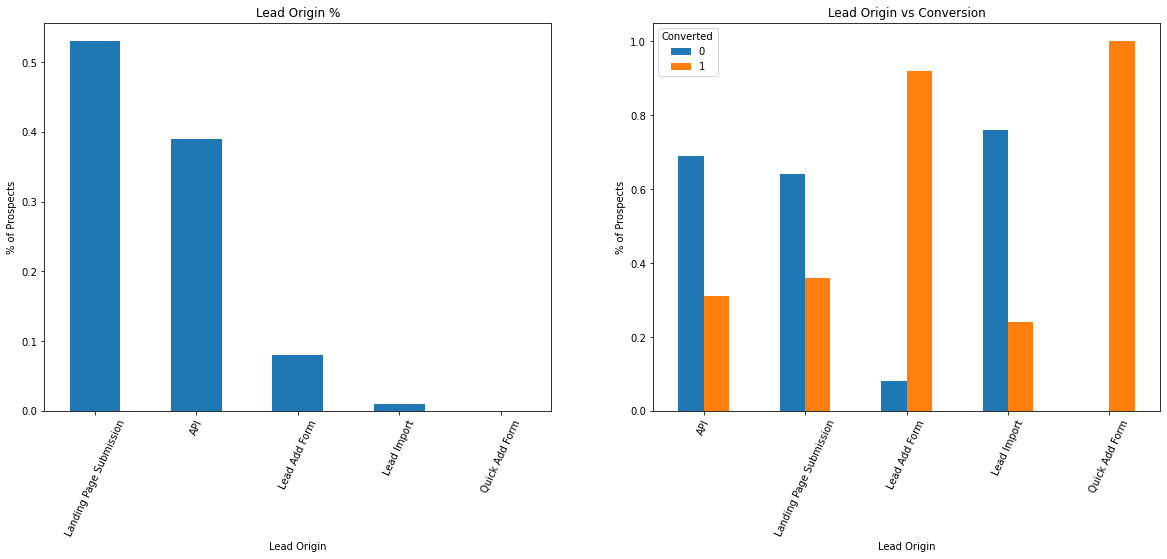



**************************************************
Normalized value counts
**************************************************
Landing Page Submission    0.529
API                        0.387
Lead Add Form              0.078
Lead Import                0.006
Quick Add Form             0.000
Name: Lead Origin, dtype: float64


**************************************************
Lead Origin v/s Conversion %
**************************************************
Converted                   0     1
Lead Origin                        
API                      0.69  0.31
Landing Page Submission  0.64  0.36
Lead Add Form            0.08  0.92
Lead Import              0.76  0.24
Quick Add Form           0.00  1.00
**************************************************


In [29]:
perform_analysis('Lead Origin')

#### Handling 'Lead Source' column

In [30]:
# Getting the value counts
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
testone                 1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

In [31]:
# Replacing 'google' with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')

# Since the missing/null values in this column are 0.39%, replacing it with 'Google', which is the mode of the column
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')

# Clubbing levels with significantly low number of values in to another level 'Others'
lead['Lead Source'] = lead['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

lead['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

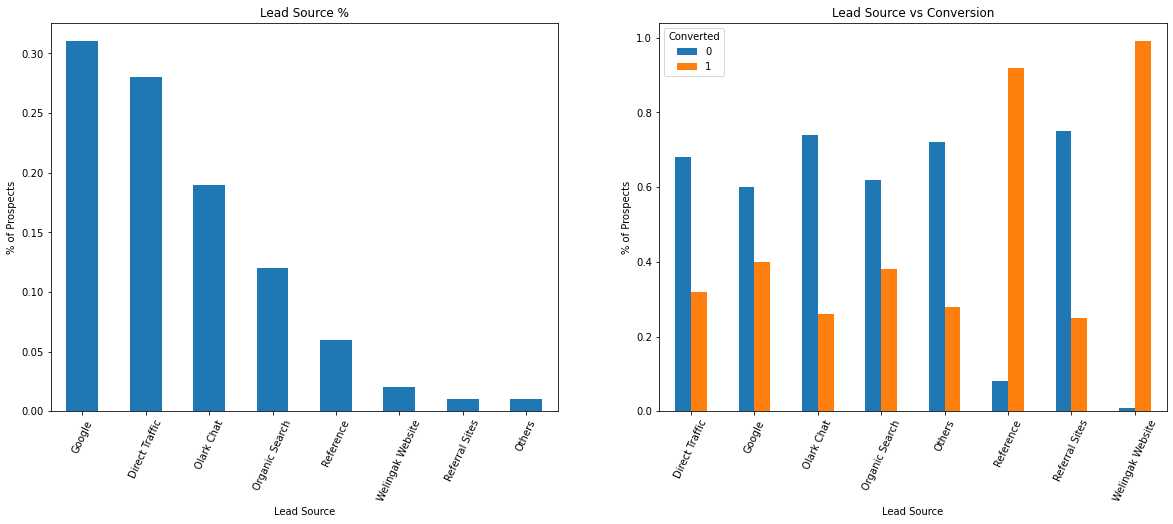



**************************************************
Normalized value counts
**************************************************
Google              0.315
Direct Traffic      0.275
Olark Chat          0.190
Organic Search      0.125
Reference           0.058
Welingak Website    0.015
Referral Sites      0.014
Others              0.008
Name: Lead Source, dtype: float64


**************************************************
Lead Source v/s Conversion %
**************************************************
Converted            0     1
Lead Source                 
Direct Traffic    0.68  0.32
Google            0.60  0.40
Olark Chat        0.74  0.26
Organic Search    0.62  0.38
Others            0.72  0.28
Reference         0.08  0.92
Referral Sites    0.75  0.25
Welingak Website  0.01  0.99
**************************************************


In [32]:
perform_analysis('Lead Source')

#### Handling 'Last Activity' column

In [33]:
# Getting the value counts
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [34]:
# Since the missing/null values in this column are 1.11%, replacing it with 'Email Opened', which is the mode of the column
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')

# Clubbing levels with significantly low number of values in to another level 'Others'
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')
lead['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

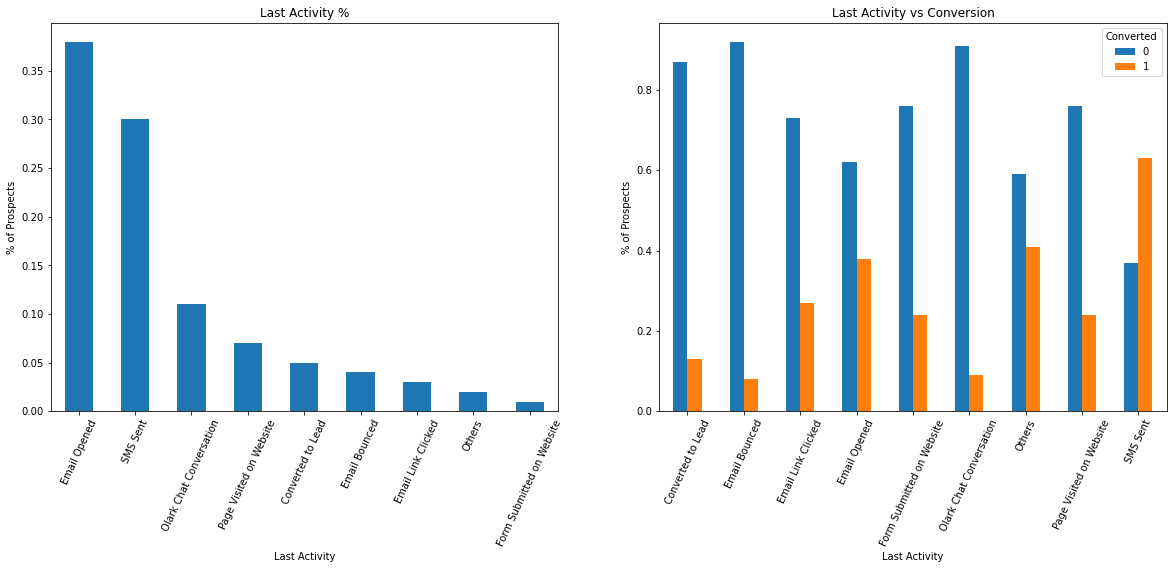



**************************************************
Normalized value counts
**************************************************
Email Opened                 0.383
SMS Sent                     0.297
Olark Chat Conversation      0.105
Page Visited on Website      0.069
Converted to Lead            0.046
Email Bounced                0.035
Email Link Clicked           0.029
Others                       0.022
Form Submitted on Website    0.013
Name: Last Activity, dtype: float64


**************************************************
Last Activity v/s Conversion %
**************************************************
Converted                     0     1
Last Activity                        
Converted to Lead          0.87  0.13
Email Bounced              0.92  0.08
Email Link Clicked         0.73  0.27
Email Opened               0.62  0.38
Form Submitted on Website  0.76  0.24
Olark Chat Conversation    0.91  0.09
Others                     0.59  0.41
Page Visited on Website    0.76  0.24
SMS Se

In [35]:
perform_analysis('Last Activity')

#### Handling Specialization column

In [36]:
# Getting the value counts
lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [37]:
# Since the missing/null values in this column are 36.58%, so we will not replace these with mode of the column, as the column will get skewed towards
# mode, instead we will replace it with 'Others' value
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

# Clubbing levels with significantly low number of values in to another level 'Others'
lead['Specialization'] = lead['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

# Getting the value counts
lead['Specialization'].value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

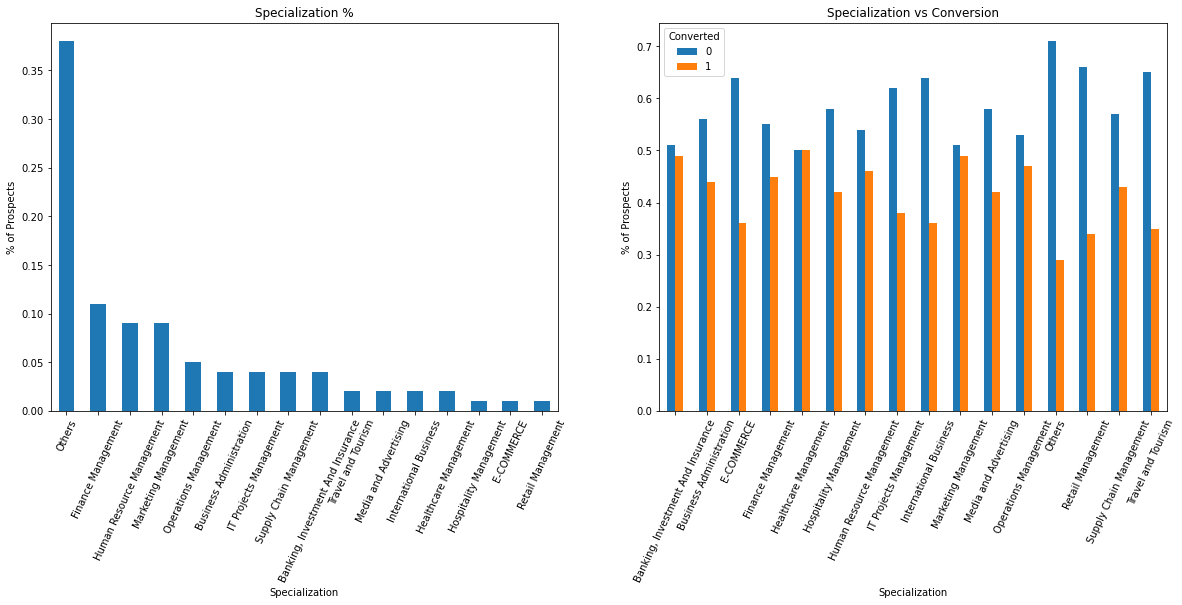



**************************************************
Normalized value counts
**************************************************
Others                               0.384
Finance Management                   0.106
Human Resource Management            0.092
Marketing Management                 0.091
Operations Management                0.054
Business Administration              0.044
IT Projects Management               0.040
Supply Chain Management              0.038
Banking, Investment And Insurance    0.037
Media and Advertising                0.022
Travel and Tourism                   0.022
International Business               0.019
Healthcare Management                0.017
E-COMMERCE                           0.012
Hospitality Management               0.012
Retail Management                    0.011
Name: Specialization, dtype: float64


**************************************************
Specialization v/s Conversion %
**************************************************
Converted  

In [38]:
perform_analysis('Specialization')

#### Handling Tags column

In [39]:
# Getting the value counts
lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [40]:
# Since the missing/null values in this column are 36.29%, so we will not replace these with mode of the column, as the column will get skewed towards
# mode, instead we will replace it with 'Others' value
lead['Tags'] = lead['Tags'].replace(np.nan, 'Others')

# Since the values in Tags column are not predefined, instead these are filled in by the sales team after the call, so we after subjectively analysing
# the values, we can say we should keep the top 4 levels with highest number of values.
# Further, we will club all the other remaining levels in to another level 'Others'
lead['Tags'] = lead['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

# Getting the value counts
lead['Tags'].value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

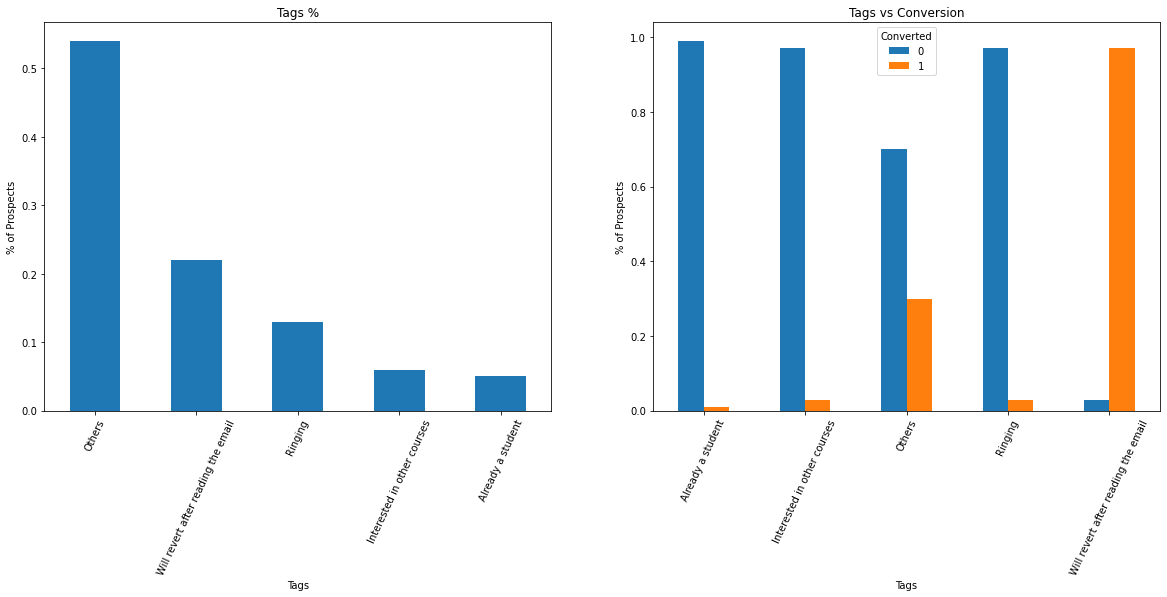



**************************************************
Normalized value counts
**************************************************
Others                                 0.540
Will revert after reading the email    0.224
Ringing                                0.130
Interested in other courses            0.056
Already a student                      0.050
Name: Tags, dtype: float64


**************************************************
Tags v/s Conversion %
**************************************************
Converted                               0     1
Tags                                           
Already a student                    0.99  0.01
Interested in other courses          0.97  0.03
Others                               0.70  0.30
Ringing                              0.97  0.03
Will revert after reading the email  0.03  0.97
**************************************************


In [41]:
perform_analysis('Tags')

#### Handling City column

In [42]:
# Getting the value counts
lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [43]:
# Since the missing/null values in this column are 39.71%, so we will not replace these with mode of the column, as the column will get skewed towards
# mode, instead we will replace it with 'Others' value
lead['City'] = lead['City'].replace(np.nan, 'Others')

# Clubbing levels with significantly low number of values in to another level 'Others'
lead['City'] = lead['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

# Getting the value counts
lead['City'].value_counts()

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64

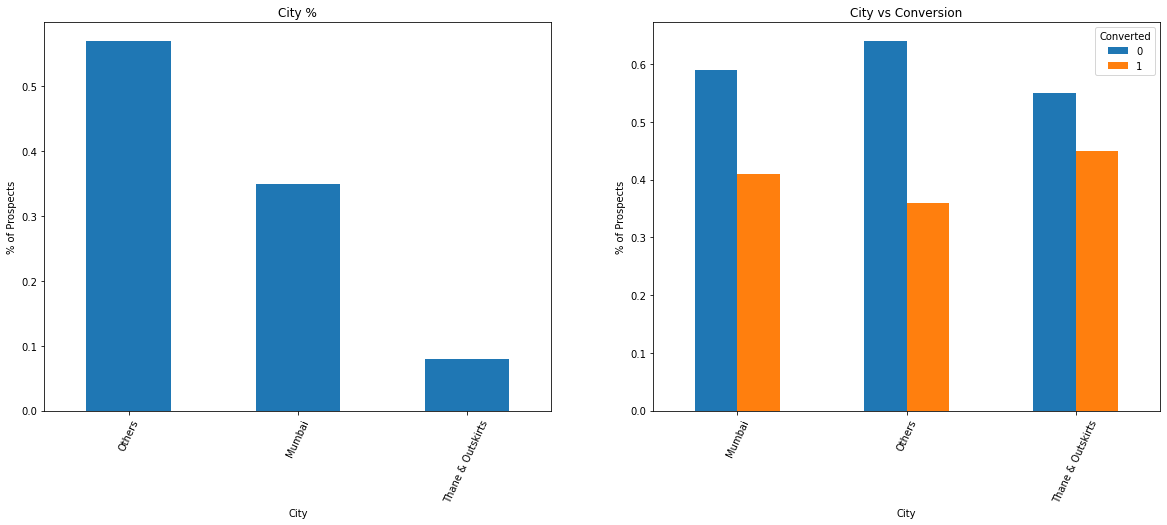



**************************************************
Normalized value counts
**************************************************
Others               0.570
Mumbai               0.349
Thane & Outskirts    0.081
Name: City, dtype: float64


**************************************************
City v/s Conversion %
**************************************************
Converted             0     1
City                         
Mumbai             0.59  0.41
Others             0.64  0.36
Thane & Outskirts  0.55  0.45
**************************************************


In [44]:
perform_analysis('City')

#### Handling 'A free copy of Mastering The Interview' column

In [45]:
# Getting the value counts
lead['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

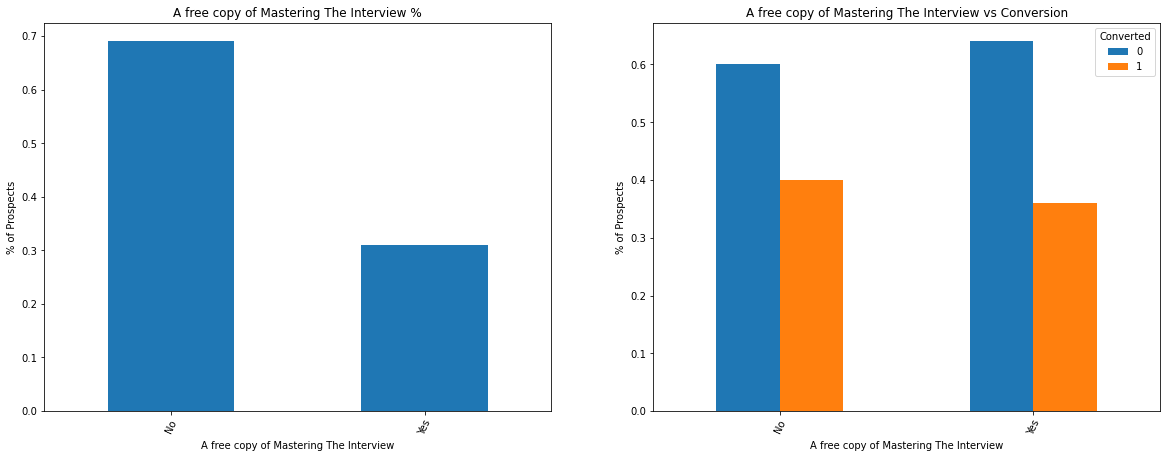



**************************************************
Normalized value counts
**************************************************
No     0.687
Yes    0.313
Name: A free copy of Mastering The Interview, dtype: float64


**************************************************
A free copy of Mastering The Interview v/s Conversion %
**************************************************
Converted                                  0     1
A free copy of Mastering The Interview            
No                                      0.60  0.40
Yes                                     0.64  0.36
**************************************************


In [46]:
perform_analysis('A free copy of Mastering The Interview')

#### Handling 'Last Notable Activity' column

In [47]:
# Getting the value counts
lead['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [48]:
# Clubbing levels with significantly low number of values in to another level 'Others'
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                       'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website',
                                                                       'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront',
                                                                       'Email Received'], 'Others')

# Getting the value counts
lead['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

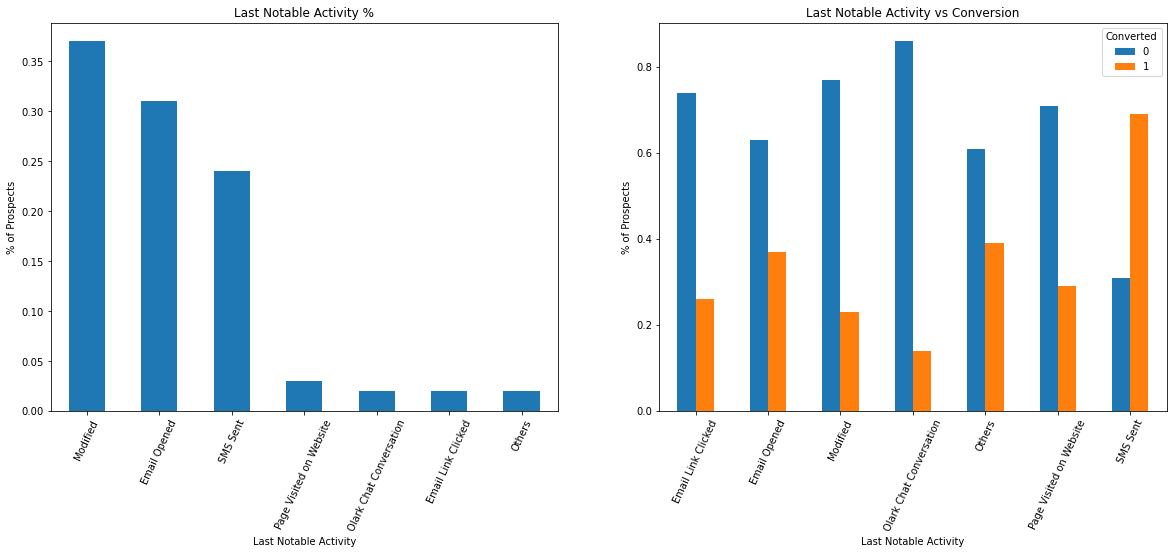



**************************************************
Normalized value counts
**************************************************
Modified                   0.369
Email Opened               0.306
SMS Sent                   0.235
Page Visited on Website    0.034
Olark Chat Conversation    0.020
Email Link Clicked         0.019
Others                     0.017
Name: Last Notable Activity, dtype: float64


**************************************************
Last Notable Activity v/s Conversion %
**************************************************
Converted                   0     1
Last Notable Activity              
Email Link Clicked       0.74  0.26
Email Opened             0.63  0.37
Modified                 0.77  0.23
Olark Chat Conversation  0.86  0.14
Others                   0.61  0.39
Page Visited on Website  0.71  0.29
SMS Sent                 0.31  0.69
**************************************************


In [49]:
perform_analysis('Last Notable Activity')

Inference:

Univariate Analysis states that ~53% of the Lead Origin is from 'Landing Page Submission' followed by ~39% from API 
Bivariate Analysis states that 'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion. All calculations shown above.

### Exploring Numerical Variables & Outlier Handling

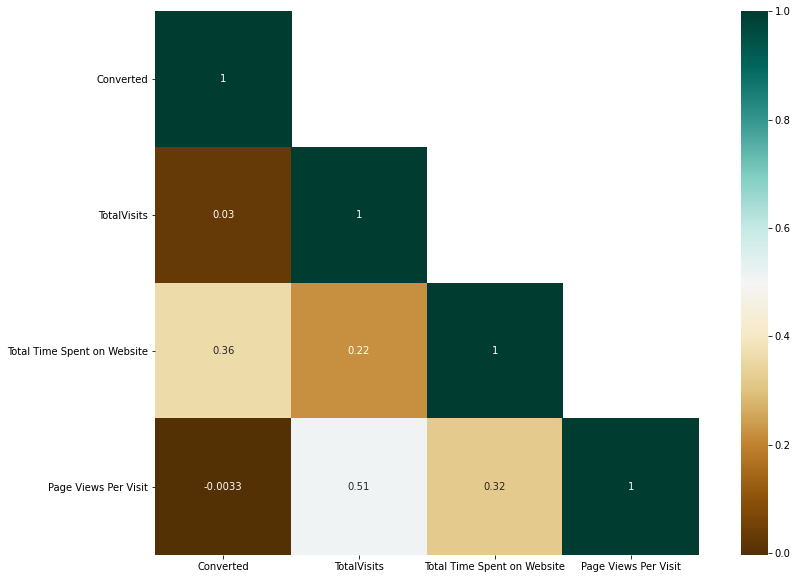

In [50]:
# Creating heatmap from correlation matrix
cor_mat= lead.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="BrBG")
plt.show()

In [51]:
# Checking the correlation matrix
cor_mat

Converted  TotalVisits  \
Converted                     1.000000     0.030395   
TotalVisits                   0.030395     1.000000   
Total Time Spent on Website   0.362483     0.221240   
Page Views Per Visit         -0.003328     0.512125   

                             Total Time Spent on Website  Page Views Per Visit  
Converted                                       0.362483             -0.003328  
TotalVisits                                     0.221240              0.512125  
Total Time Spent on Website                     1.000000              0.320361  
Page Views Per Visit                            0.320361              1.000000

From the heatmap and correlation matrix above, we can see that the 'TotalVisits' and 'Page Views Per Visit' are highly correlated with correlation coefficient of 0.51, so we will drop 'Page Views Per Visit' column.

In [52]:
# Dropping 'Page Views Per Visit' column
lead.drop('Page Views Per Visit', axis=1, inplace=True)

In [53]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Last Activity                           9240 non-null   object 
 6   Specialization                          9240 non-null   object 
 7   Tags                                    9240 non-null   object 
 8   City                                    9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [54]:
# Getting the numerical columns in to a new dataset lead_num
lead_num = lead.select_dtypes(exclude = 'object')
lead_num.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website'], dtype='object')

In [55]:
# Dropping 'Converted' column from lead_num
lead_num = lead_num.drop('Converted',axis=1)
lead_num.columns

Index(['TotalVisits', 'Total Time Spent on Website'], dtype='object')

In [56]:
# Calculating the first quartile at 25%
Q1 = lead_num.quantile(0.25)
Q1

TotalVisits                     1.0
Total Time Spent on Website    12.0
Name: 0.25, dtype: float64

In [57]:
# Calculating the third quartile at 75%
Q3 = lead_num.quantile(0.75)
Q3

TotalVisits                      5.0
Total Time Spent on Website    936.0
Name: 0.75, dtype: float64

In [58]:
# Calculating the Inter-quartile Range
IQR = Q3 - Q1
print(IQR)

TotalVisits                      4.0
Total Time Spent on Website    924.0
dtype: float64


#### Checking for Outliers

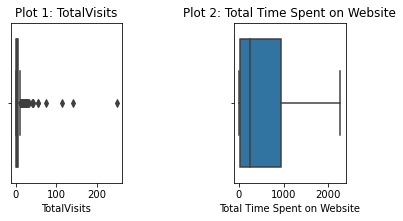

In [59]:
# Creating Boxplots to visualize the outliers
plt.figure(figsize=(10,10))

for i in enumerate(lead_num):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(lead[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.subplots_adjust(wspace=1,hspace=0.2)

plt.show()

We can see from the box plots above, that 'TotalVisits' has clear outliers on the higher side, so let's perform the outlier treatment by capping the outliers on the higher side.

In [60]:
# Defining the function to do further analysis on the TotalVisits column for outlier treatment
def check_outliers(Feature):
    
    # Creating bins out of value counts to see the distribution
    print('*******************************************')
    print('Creating bins out of value counts to see the distribution')
    print('*******************************************')
    print(lead[Feature].value_counts(bins=3))
    print('\n')
    
    # Describing the columns at various percentiles [0.25,0.5,0.75,0.9,0.99,1]
    print('*******************************************')
    print('Describing the columns at various percentiles [0.25,0.5,0.75,0.9,0.99,1]')
    print('*******************************************')
    print(round(lead[Feature].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2))
    print('\n')
    
    # Creating Boxplot and Distplot for Feature column
    print('*******************************************')
    print('Creating Boxplot and Distplot for '+ Feature +' column')
    print('*******************************************')
    plt.figure(figsize=(15, 10))

    plt.subplot(221)
    sns.boxplot(lead[Feature])
    plt.title(Feature)
    plt.xlabel(Feature)
    plt.xticks(rotation= 0)

    plt.subplot(222)
    sns.distplot(lead[Feature].dropna())
    plt.title(Feature)
    plt.xlabel(Feature)
    plt.xticks(rotation= 0)
    plt.ylabel('% of Users')

    plt.show()

*******************************************
Creating bins out of value counts to see the distribution
*******************************************
(-0.252, 83.667]     9100
(83.667, 167.333]       2
(167.333, 251.0]        1
Name: TotalVisits, dtype: int64


*******************************************
Describing the columns at various percentiles [0.25,0.5,0.75,0.9,0.99,1]
*******************************************
count    9103.00
mean        3.45
std         4.85
min         0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
99%        17.00
100%      251.00
max       251.00
Name: TotalVisits, dtype: float64


*******************************************
Creating Boxplot and Distplot for TotalVisits column
*******************************************


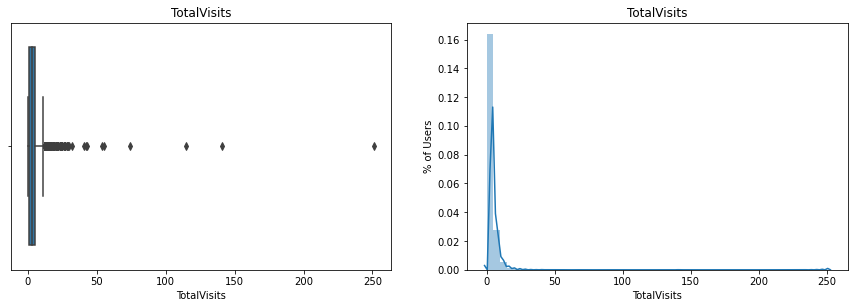

In [61]:
# Performing the outlier check
check_outliers('TotalVisits')

In [62]:
# Capping the outliers on the higher side to 1.5*IQR
lead.loc[lead['TotalVisits'] > (Q3['TotalVisits'] + 1.5*IQR['TotalVisits']), 'TotalVisits'] = Q3['TotalVisits'] + 1.5*IQR['TotalVisits']

In [63]:
# Performing the outlier chech again
check_outliers('TotalVisits')

*******************************************
Creating bins out of value counts to see the distribution
*******************************************
(-0.012, 3.667]    5570
(3.667, 7.333]     2678
(7.333, 11.0]       855
Name: TotalVisits, dtype: int64


*******************************************
Describing the columns at various percentiles [0.25,0.5,0.75,0.9,0.99,1]
*******************************************
count    9103.00
mean        3.22
std         2.88
min         0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
99%        11.00
100%       11.00
max        11.00
Name: TotalVisits, dtype: float64


*******************************************
Creating Boxplot and Distplot for TotalVisits column
*******************************************


In [64]:
lead.shape

(9240, 11)

#### Dropping NULL value rows from the columns 'TotalVisits'

In [65]:
lead.shape

(9240, 11)

In [66]:
lead=lead.dropna(subset=['TotalVisits'])

In [67]:
lead.shape

(9103, 11)

In [68]:
lead.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Last Activity                             0
Specialization                            0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [69]:
# Checking the percentage of columns left after imputation
round((100*lead.shape[0]/9240),2)

98.52

In [70]:
# Checking the value counts for all the columns in lead dataset for final analysis
for col in lead:
    print(lead[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64 

Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64 

0    5642
1    3461
Name: Converted, dtype: int64 

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
11.0     353
7.0      309
8.0      224
9.0      164
10.0     114
Name: TotalVisits, dtype: int64 

0       2193
60        19
75        18
127       18
74        17
        ... 
1235       1
1091       1
1043       1
1035       1
1891       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64 

Email Opened                 3437
SMS Sent                     2738
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead  

#### Converting the Yes/No column to 1/0

In [71]:
varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [72]:
lead['A free copy of Mastering The Interview'].value_counts()

0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [73]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Last Activity                           9103 non-null   object 
 6   Specialization                          9103 non-null   object 
 7   Tags                                    9103 non-null   object 
 8   City                                    9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   int64  
 10  Last Notable Activity                   9103 non-null   obje

#### Creating the dummy variables for categorical variables using get_dummies

In [74]:
lead = pd.get_dummies(lead, drop_first=True)

In [75]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Converted                                      9103 non-null   int64  
 1   TotalVisits                                    9103 non-null   float64
 2   Total Time Spent on Website                    9103 non-null   int64  
 3   A free copy of Mastering The Interview         9103 non-null   int64  
 4   Lead Origin_Landing Page Submission            9103 non-null   uint8  
 5   Lead Origin_Lead Add Form                      9103 non-null   uint8  
 6   Lead Origin_Lead Import                        9103 non-null   uint8  
 7   Lead Source_Google                             9103 non-null   uint8  
 8   Lead Source_Olark Chat                         9103 non-null   uint8  
 9   Lead Source_Organic Search                     9103 

In [76]:
lead.shape

(9103, 49)

So, after the analysis and treatment of all the categorical and numerical varibales, our dataset lead is ready for test-train splt and further model building.

Let's proceed ahead with that.

# Step 5: Correlations and further validation/treatment

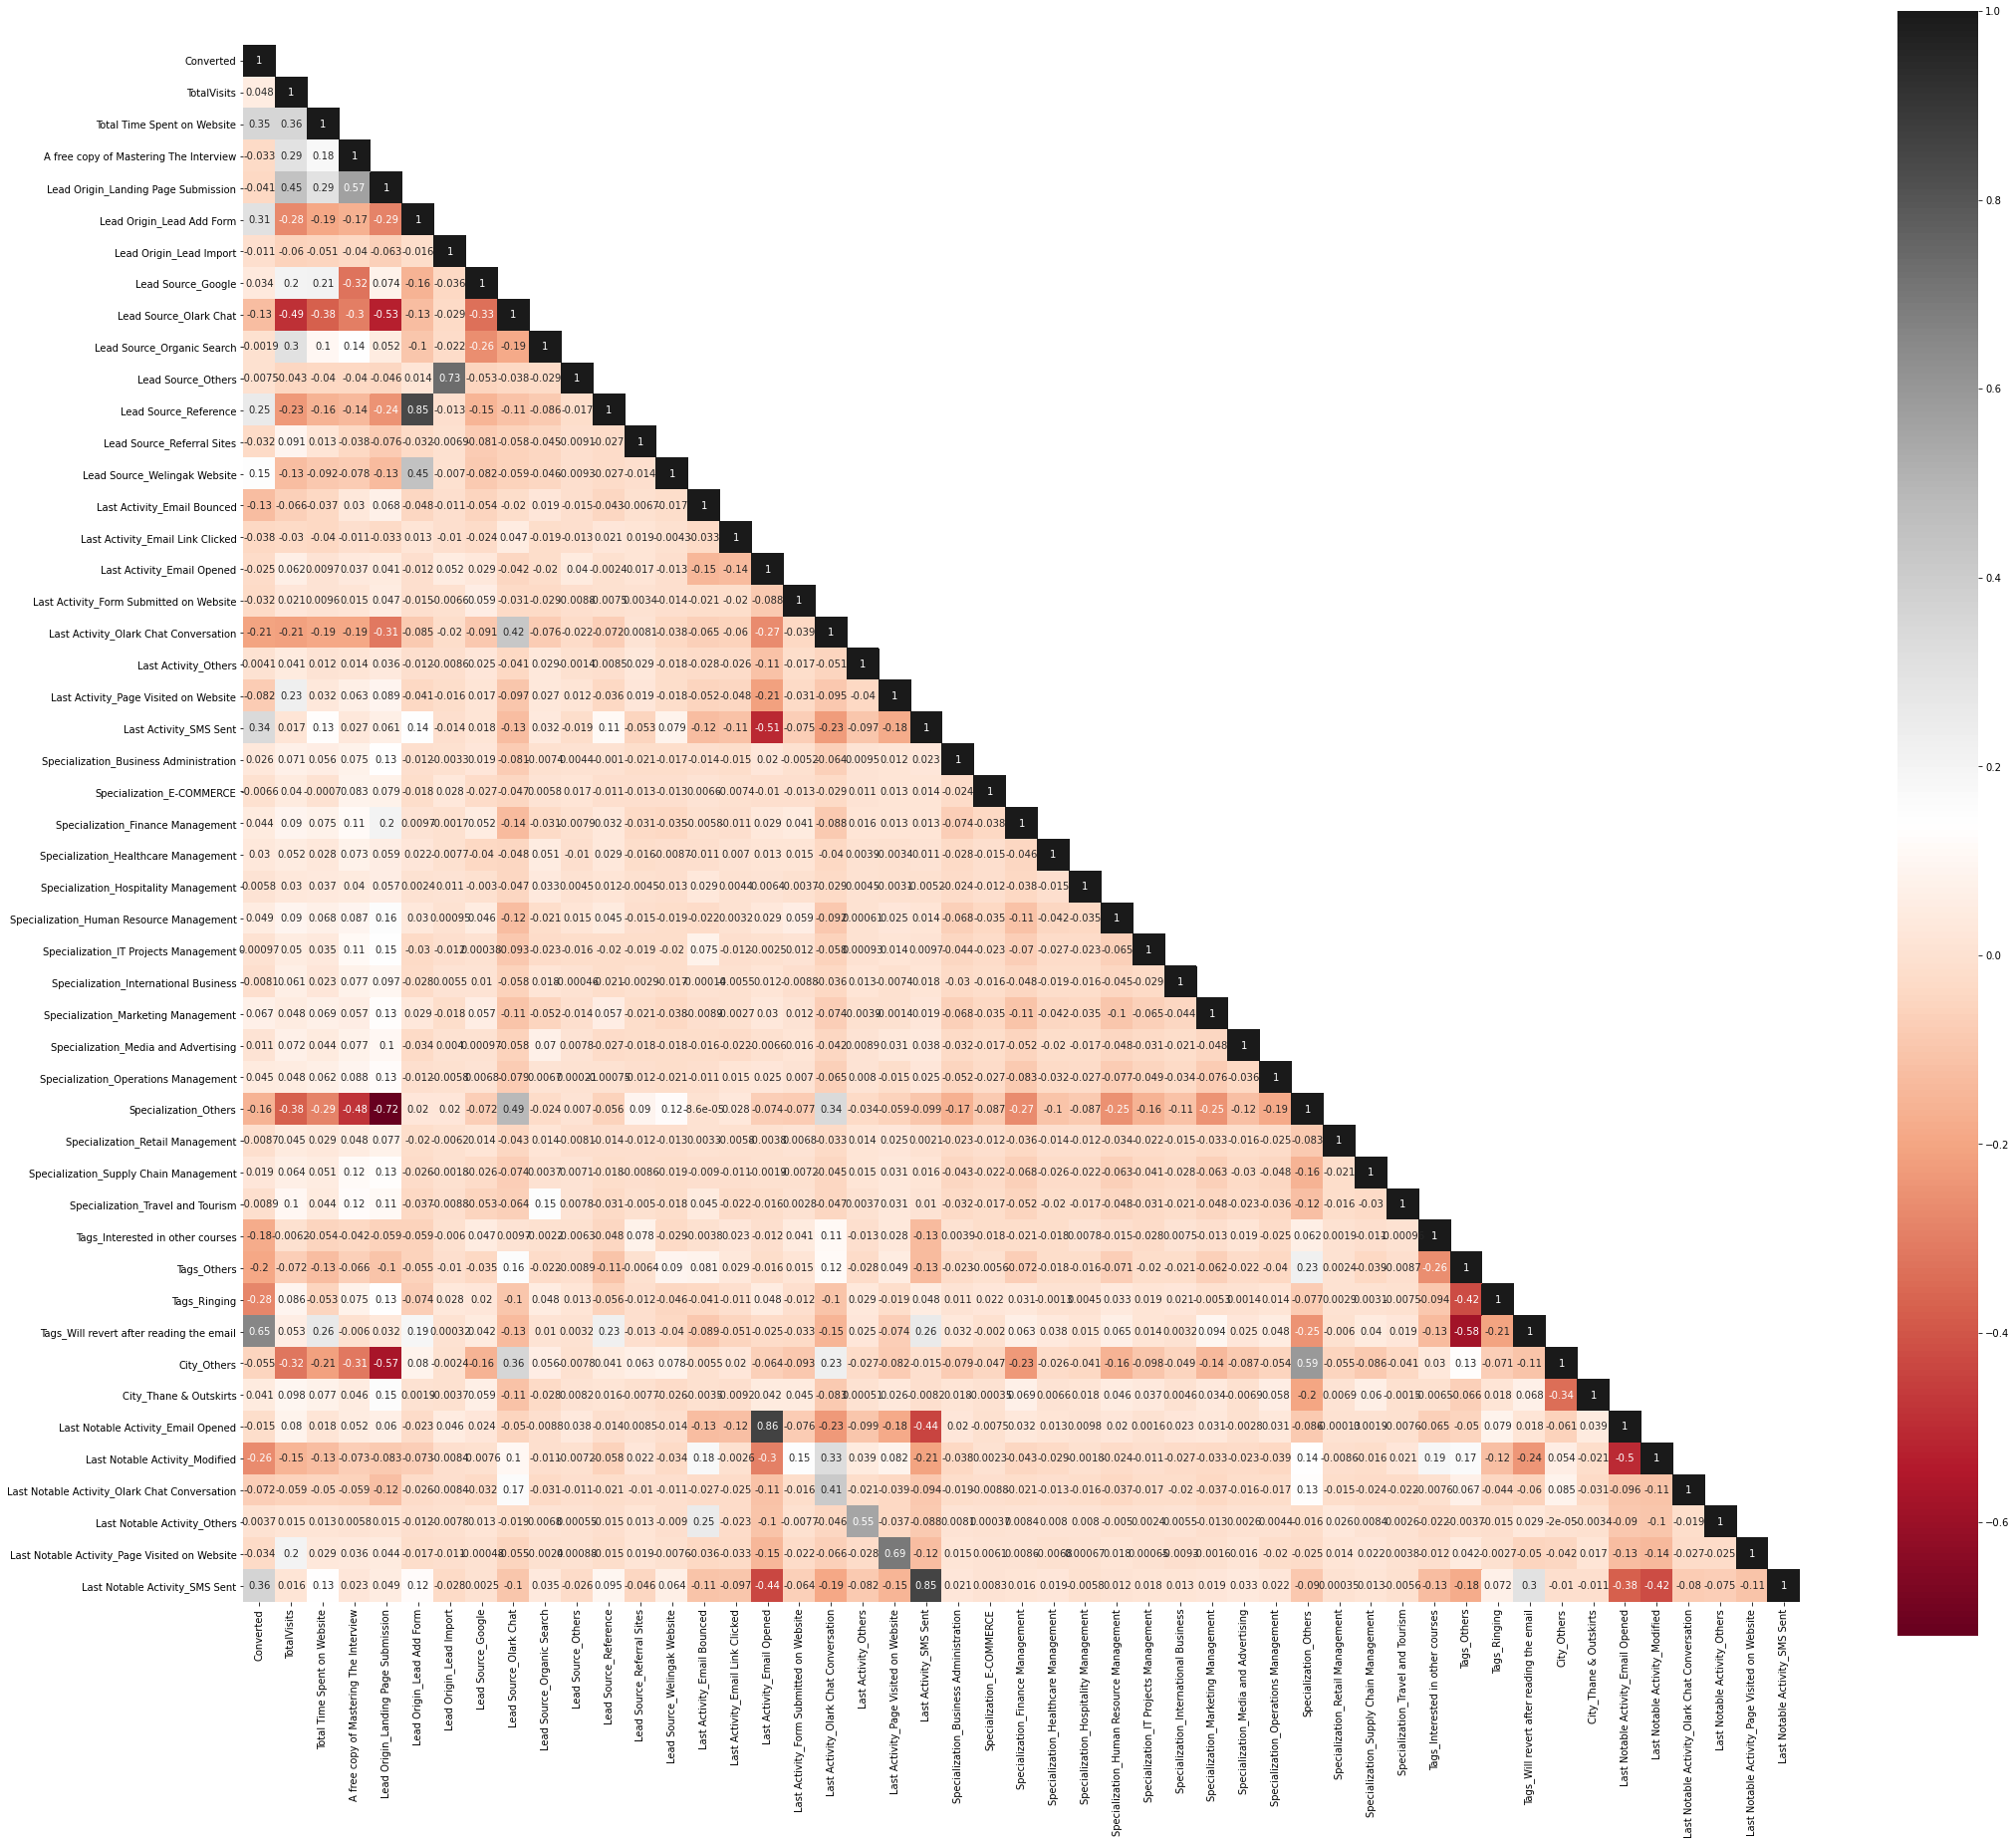

In [77]:
# Checking the correlation heatmap
cor_mat= lead.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

From the correlation heatmap above, we see that there are many columns which are highly correlated, dropping those columns in lead dataset, as per below:

In [78]:
# Dropping highly correlated columns in lead dataset
lead = lead.drop(['Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

In [79]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Converted                                 9103 non-null   int64  
 1   TotalVisits                               9103 non-null   float64
 2   Total Time Spent on Website               9103 non-null   int64  
 3   A free copy of Mastering The Interview    9103 non-null   int64  
 4   Lead Origin_Lead Add Form                 9103 non-null   uint8  
 5   Lead Origin_Lead Import                   9103 non-null   uint8  
 6   Lead Source_Google                        9103 non-null   uint8  
 7   Lead Source_Organic Search                9103 non-null   uint8  
 8   Lead Source_Referral Sites                9103 non-null   uint8  
 9   Last Activity_Email Bounced               9103 non-null   uint8  
 10  Last Activity_Email Link Clicked    

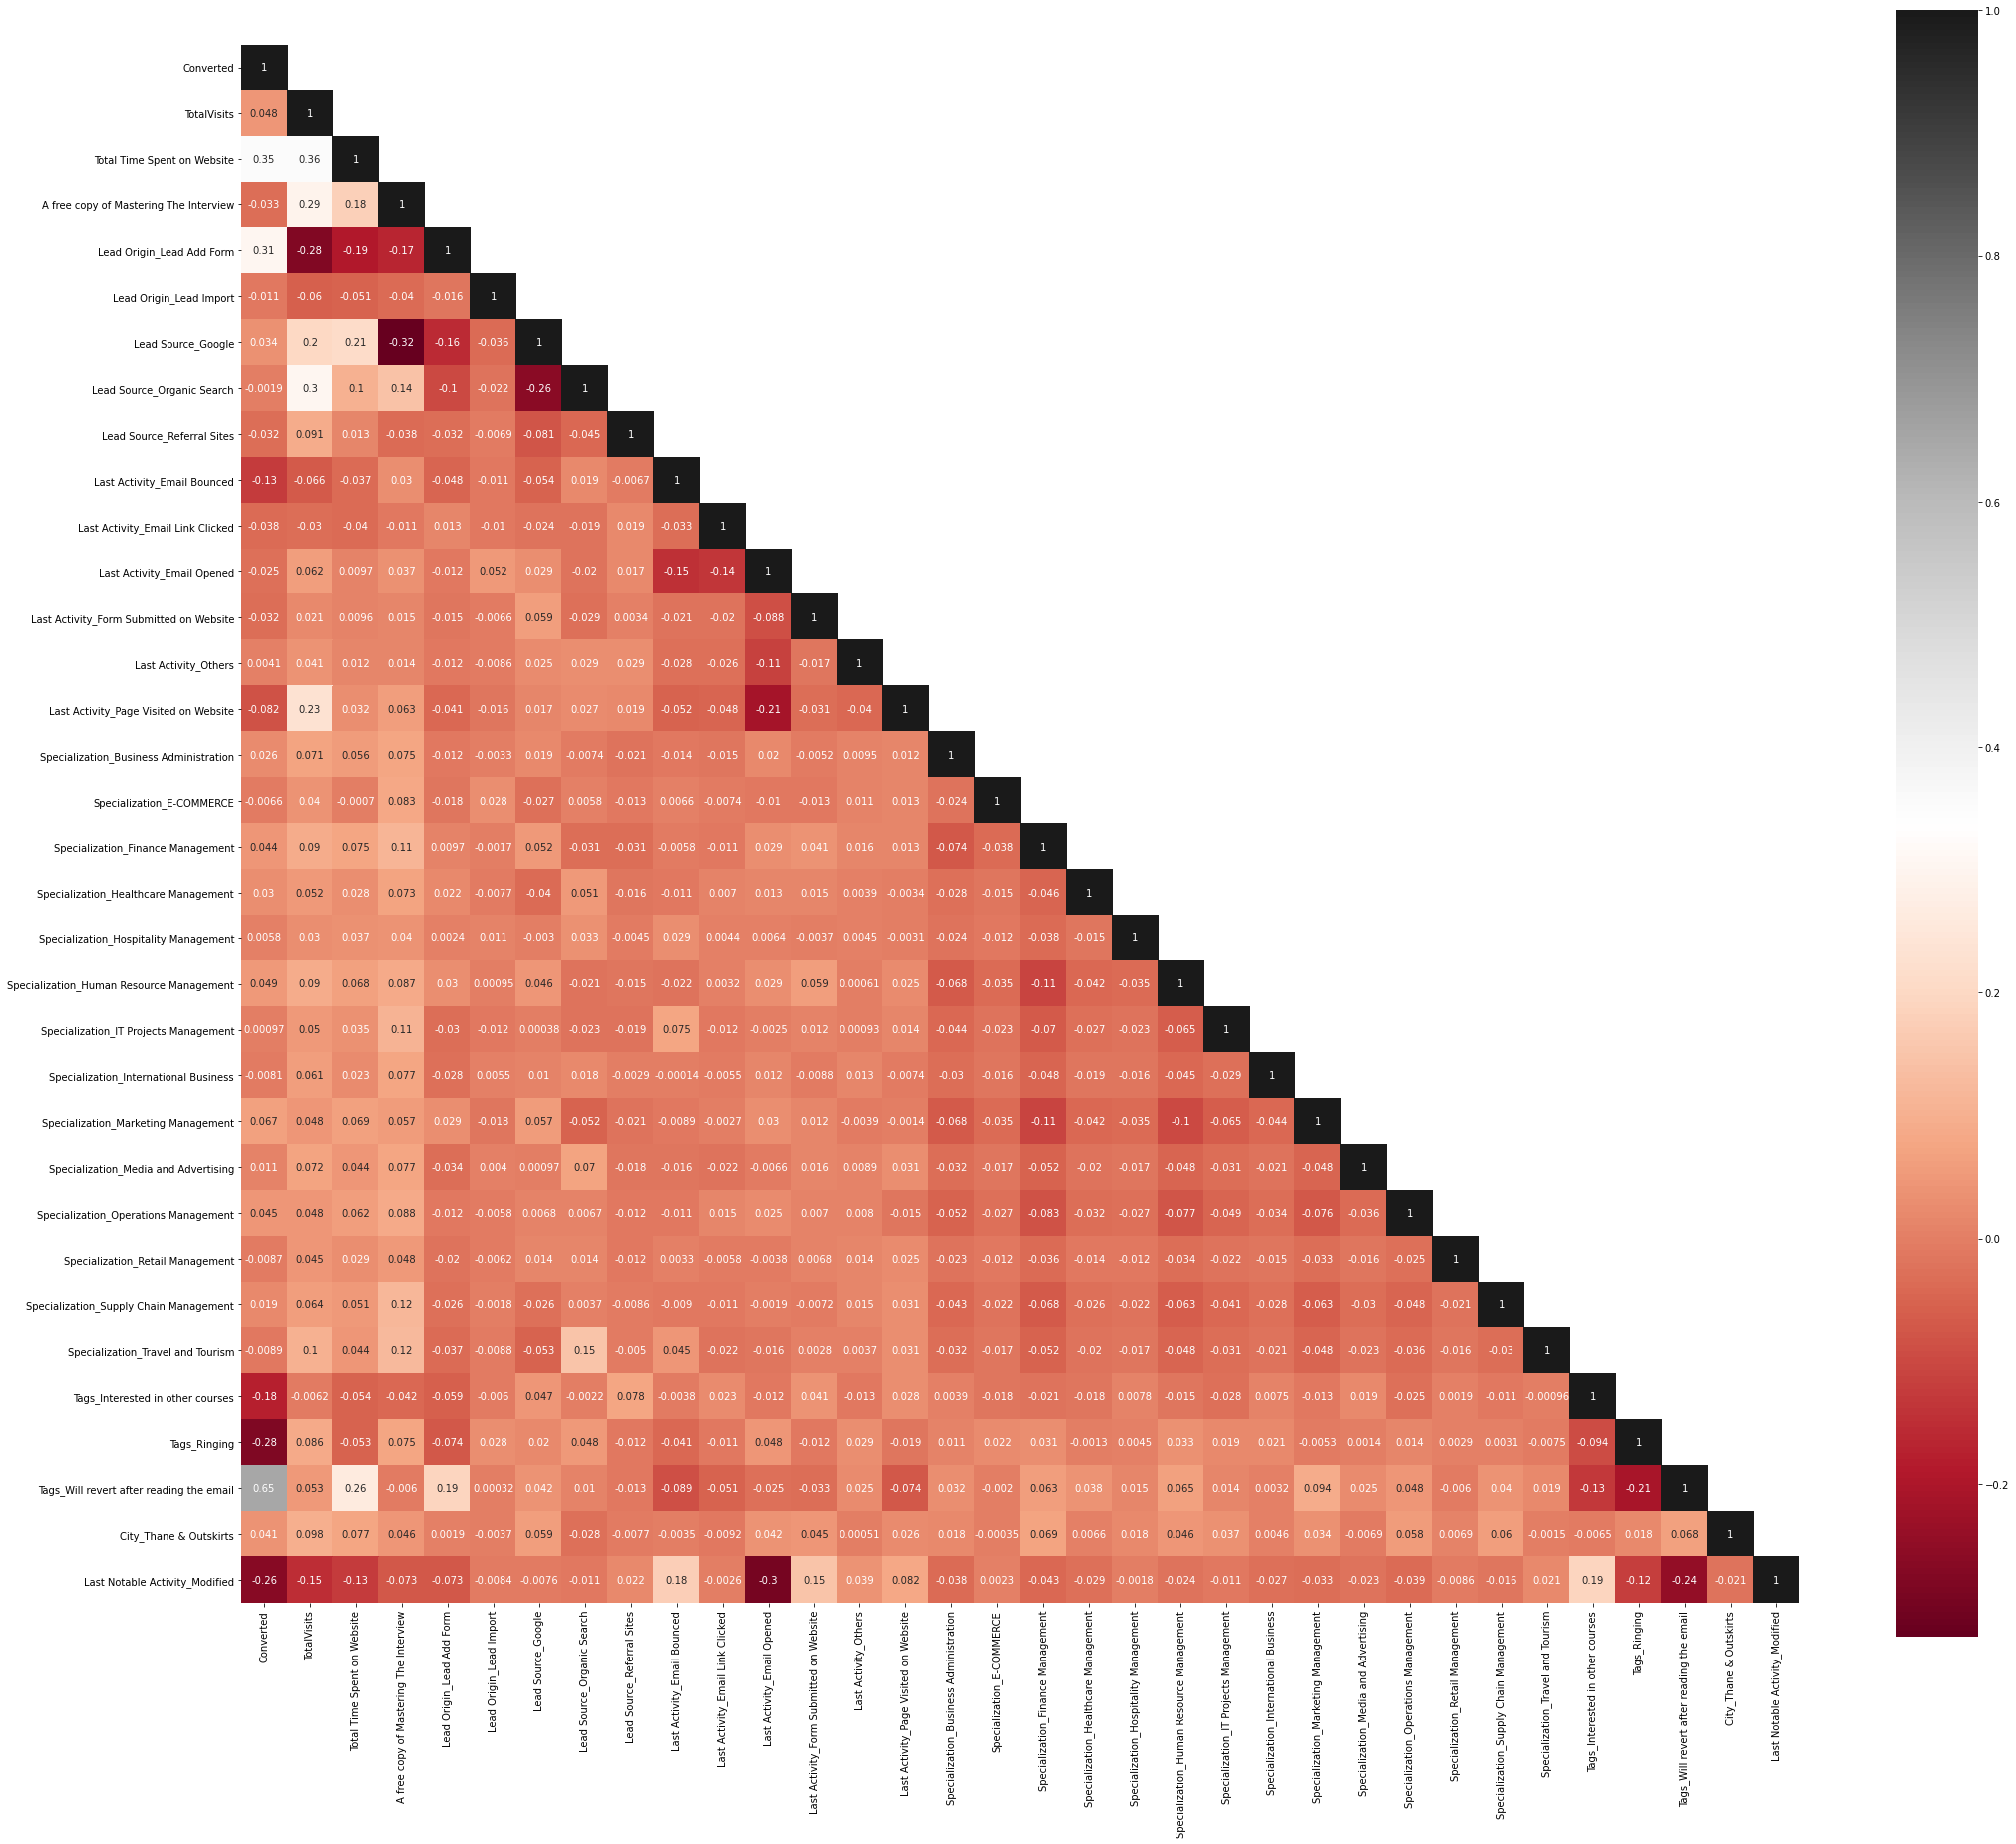

In [80]:
# Checking the correlation heatmap
cor_mat= lead.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

After remocing the highly correlated columns, we have now see in the correlation heatmap above, that the correlation is not on the higher side.

We can now proceed ahead with feature scaling and further model building.

# Step 6: Test-Train Split

In [81]:
# Creating X variable by dropping target variable 'Converted'
X = lead.drop(['Converted'], axis=1)

X.head()

TotalVisits  Total Time Spent on Website  \
0          0.0                            0   
1          5.0                          674   
2          2.0                         1532   
3          1.0                          305   
4          2.0                         1428   

   A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
0                        0                   0                           0   
1                        0                   0                           1   
2                        0                   0                           0   
3                        0                   0                           0   
4                        0                   1                           0   

   Lead Source_Referral Sites  Last Activity_Email Bounced  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  Last Activity_Others  \
0                                        0                     0   
1                                        0                     0   
2                                        0                     0   
3                                        0                     1   
4                                        0                     0   

   Last Activity_Page Visited on Website  \
0                                      1   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Business Administration  Specialization_E-COMMERCE  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3            

In [82]:
# Creating y variable with target variable 'Converted'
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Step 7: Feature Scaling

In [84]:
X_train.head()

TotalVisits  Total Time Spent on Website  \
9000          2.0                           60   
6902          1.0                          495   
7593          0.0                            0   
1498          9.0                          413   
4137          6.0                         1049   

      A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
9000                                       0                          0   
6902                                       0                          0   
7593                                       0                          0   
1498                                       1                          0   
4137                                       0                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
9000                        0                   1                           0   
6902                        0                   0                           0   
7593                        0                   0                           0   
1498                        0                   0                           1   
4137                        0                   1                           0   

      Lead Source_Referral Sites  Last Activity_Email Bounced  \
9000                           0                            0   
6902                           0                            1   
7593                           0                            0   
1498                           0                            0   
4137                           0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
9000                                 0                           0   
6902                                 0                           0   
7593                                 0                           1   
1498                                 0                           1   
4137                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Others  \
9000                                        0                     0   
6902                                        0                     0   
7593                                        0                     0   
1498                                        0                     0   
4137                                        0                     0   

      Last Activity_Page Visited on Website  \
9000                                      0   
6902                                      0   
7593                                      0   
1498                                      0   
4137                                      0   

      Specialization_Business Administration  Specialization_E-COMMERCE  \
9000                                       0                          0   
6902                                       0                          0   
7593                                       0                          0   
1498                                       0                          0   
4137                                       1                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
9000                                  0                                     0   
6902                                  0                                     0   
7593                                  0                                     0   
1498                                  0                                     0   
4137                                  0                                     0   

      Specialization_Hospitality Management  \
9000                                      0   
6902                                      0   
7593                                      0   
1498                                      0   
4137                                      0   

      Specialization_Hum

In [85]:
# Putting the variables to scale in the var_to_scale variable
var_to_scale=['TotalVisits','Total Time Spent on Website']

In [86]:
# Performing Standard scaling on X_train dataset
scaler = StandardScaler()

X_train[var_to_scale] = scaler.fit_transform(X_train[var_to_scale])

X_train.head()

TotalVisits  Total Time Spent on Website  \
9000    -0.424957                    -0.771069   
6902    -0.769331                     0.026359   
7593    -1.113704                    -0.881059   
1498     1.985657                    -0.123961   
4137     0.952536                     1.041934   

      A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
9000                                       0                          0   
6902                                       0                          0   
7593                                       0                          0   
1498                                       1                          0   
4137                                       0                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
9000                        0                   1                           0   
6902                        0                   0                           0   
7593                        0                   0                           0   
1498                        0                   0                           1   
4137                        0                   1                           0   

      Lead Source_Referral Sites  Last Activity_Email Bounced  \
9000                           0                            0   
6902                           0                            1   
7593                           0                            0   
1498                           0                            0   
4137                           0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
9000                                 0                           0   
6902                                 0                           0   
7593                                 0                           1   
1498                                 0                           1   
4137                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Others  \
9000                                        0                     0   
6902                                        0                     0   
7593                                        0                     0   
1498                                        0                     0   
4137                                        0                     0   

      Last Activity_Page Visited on Website  \
9000                                      0   
6902                                      0   
7593                                      0   
1498                                      0   
4137                                      0   

      Specialization_Business Administration  Specialization_E-COMMERCE  \
9000                                       0                          0   
6902                                       0                          0   
7593                                       0                          0   
1498                                       0                          0   
4137                                       1                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
9000                                  0                                     0   
6902                                  0                                     0   
7593                                  0                                     0   
1498                                  0                                     0   
4137                                  0                                     0   

      Specialization_Hospitality Management  \
9000                                      0   
6902                                      0   
7593                                      0   
1498                                      0   
4137                                      0   

      Specialization_Hum

# Step 8: First Model Building

## Model 1 (Train)

In [87]:
import statsmodels.api as sm

In [88]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train)

logm1 = sm.Logit(y_train, X_train_sm)
logm1_model = logm1.fit()

logm1_model.summary()

Optimization terminated successfully.
         Current function value: 0.294888
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7248
Method:                           MLE   Df Model:                           33
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.5555
Time:                        23:12:37   Log-Likelihood:                -2147.4
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1014      0.100     -1.015      0.310      -0.297       0.094
TotalVisits                                  0.1382      0.050      2.782      0.005       0.041       0.235
Total Time Spent on Website                  0.9990      0.044     22.820      0.000       0.913       1.085
A free copy of Mastering The Interview      -0.3609      0.113     -3.206      0.001      -0.582      -0.140
Lead Origin_Lead Add Form                    4.4249      0.232     19.072      0.000       3.970       4.880
Lead Origin_Lead Import                      0.6038      0.666      0.906      0.365      -0.702       1.909
Lead Source_Google                          -0.2722      0.106     -2.569      0.010      -0.480      -0.064
Lead Source_Organic Search                  -0.2241      0.133     -1.686      0.092      -0.485       0.036
Lead Source_Referral Sites                  -0.7672      0.398     -1.928      0.054      -1.547       0.013
Last Activity_Email Bounced                 -2.0439      0.342     -5.977      0.000      -2.714      -1.374
Last Activity_Email Link Clicked            -0.7954      0.233     -3.412      0.001      -1.252      -0.339
Last Activity_Email Opened                  -0.6660      0.090     -7.422      0.000      -0.842      -0.490
Last Activity_Form Submitted on Website     -0.2797      0.353     -0.791      0.429      -0.972       0.413
Last Activity_Others                        -0.3480      0.288     -1.206      0.228      -0.913       0.217
Last Activity_Page Visited on Website       -1.0491      0.168     -6.249      0.000      -1.378      -0.720
Specialization_Business Administration      -0.1897      0.208     -0.913      0.361      -0.597       0.217
Specialization_E-COMMERCE                    0.1450      0.351      0.413      0.680      -0.544       0.834
Specialization_Finance Management           -0.1217      0.151     -0.806      0.420      -0.418       0.174
Specialization_Healthcare Management        -0.5123      0.332     -1.541      0.123      -1.164       0.139
Specialization_Hospitality Management       -0.4047      0.364     -1.110      0.267      -1.119       0.310
Specialization_Human Resource Management    -0.1247      0.160     -0.781      0.435      -0.437       0.188
Specialization_IT Projects Management       -0.0944      0.228     -0.415      0.678      -0.540       0.352
Specialization_International Business       -0.4793      0.303     -1.583      0.113      -1.073       0.114
Specialization_Marketing Management          0.0349      0.153      0.228      0.820      -0.265       0.335
Specialization_Media and Advertising        -0.1390      0.279     -0.497      0.619      -0.687       0.409
Specialization_Operations Management         0.0102      0.186      0.055      0.956      -0.354       0.375
Specialization_Retail Management            -0.2405      0.353     -0.681      0

# Step 9: Feature Selection Using RFE

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [90]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables
rfe = rfe.fit(X_train, y_train)

In [91]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False,  True])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Others', False, 3),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 2),
 ('Specialization_Human Resource Management', False, 15),
 ('Specialization_IT Projects Management', False, 17),
 ('Specialization_Interna

In [93]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management', 'City_Thane & Outskirts'],
      dtype='object')

# Step 10: Creating further Models using RFE variables

## Model 2 (Train)

In [95]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.Logit(y_train, X_train_sm)
logm2_model = logm2.fit()
logm2_model.summary()

Optimization terminated successfully.
         Current function value: 0.296769
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7266
Method:                           MLE   Df Model:                           15
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.5527
Time:                        23:12:39   Log-Likelihood:                -2161.1
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3958      0.071     -5.592      0.000      -0.535      -0.257
Total Time Spent on Website                  0.9609      0.040     24.278      0.000       0.883       1.039
Lead Origin_Lead Add Form                    4.4667      0.226     19.785      0.000       4.024       4.909
Lead Origin_Lead Import                      0.6593      0.664      0.993      0.321      -0.642       1.961
Lead Source_Referral Sites                  -0.4984      0.393     -1.267      0.205      -1.270       0.273
Last Activity_Email Bounced                 -2.0372      0.339     -6.015      0.000      -2.701      -1.373
Last Activity_Email Link Clicked            -0.7677      0.233     -3.297      0.001      -1.224      -0.311
Last Activity_Email Opened                  -0.6588      0.088     -7.522      0.000      -0.830      -0.487
Last Activity_Page Visited on Website       -0.9480      0.160     -5.941      0.000      -1.261      -0.635
Specialization_Healthcare Management        -0.5243      0.318     -1.651      0.099      -1.147       0.098
Specialization_International Business       -0.4291      0.290     -1.480      0.139      -0.997       0.139
Specialization_Travel and Tourism           -0.8537      0.300     -2.846      0.004      -1.442      -0.266
Tags_Interested in other courses            -2.4274      0.330     -7.360      0.000      -3.074      -1.781
Tags_Ringing                                -3.3719      0.233    -14.471      0.000      -3.829      -2.915
Tags_Will revert after reading the email     4.1521      0.158     26.323      0.000       3.843       4.461
Last Notable Activity_Modified              -1.1261      0.089    -12.647      0.000      -1.301      -0.952
============================================================================================================
"""

From the summary above, we see that the variable 'Lead Origin_Lead Import' has a p-value of 0.321, so it is highly insignificant, let's further check the VIF values and decide whether we should drop this column.

### Checking VIFs

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14            Last Notable Activity_Modified  1.31
13  Tags_Will revert after reading the email  1.29
6                 Last Activity_Email Opened  1.22
1                  Lead Origin_Lead Add Form  1.18
0                Total Time Spent on Website  1.16
11          Tags_Interested in other courses  1.13
12                              Tags_Ringing  1.10
4                Last Activity_Email Bounced  1.08
7      Last Activity_Page Visited on Website  1.08
10         Specialization_Travel and Tourism  1.03
3                 Lead Source_Referral Sites  1.02
5           Last Activity_Email Link Clicked  1.02
8       Specialization_Healthcare Management  1.02
9      Specialization_International Business  1.02
2                    Lead Origin_Lead Import  1.01

VIF values are all fairly below 5, so this is good, let's proceed ahead with dropping column 'Lead Origin_Lead Import'.

In [98]:
col = col.drop('Lead Origin_Lead Import')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

## Model 3 (Train)

In [99]:
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.Logit(y_train, X_train_sm)
logm3_model = logm3.fit()
logm3_model.summary()

Optimization terminated successfully.
         Current function value: 0.296832
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7267
Method:                           MLE   Df Model:                           14
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.5526
Time:                        23:12:39   Log-Likelihood:                -2161.5
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3949      0.071     -5.580      0.000      -0.534      -0.256
Total Time Spent on Website                  0.9588      0.040     24.271      0.000       0.881       1.036
Lead Origin_Lead Add Form                    4.4620      0.226     19.773      0.000       4.020       4.904
Lead Source_Referral Sites                  -0.5007      0.394     -1.272      0.203      -1.272       0.271
Last Activity_Email Bounced                 -2.0378      0.339     -6.017      0.000      -2.702      -1.374
Last Activity_Email Link Clicked            -0.7687      0.233     -3.301      0.001      -1.225      -0.312
Last Activity_Email Opened                  -0.6561      0.088     -7.496      0.000      -0.828      -0.485
Last Activity_Page Visited on Website       -0.9487      0.160     -5.946      0.000      -1.261      -0.636
Specialization_Healthcare Management        -0.5262      0.318     -1.656      0.098      -1.149       0.096
Specialization_International Business       -0.4258      0.289     -1.473      0.141      -0.993       0.141
Specialization_Travel and Tourism           -0.8557      0.300     -2.851      0.004      -1.444      -0.268
Tags_Interested in other courses            -2.4274      0.330     -7.362      0.000      -3.074      -1.781
Tags_Ringing                                -3.3700      0.233    -14.463      0.000      -3.827      -2.913
Tags_Will revert after reading the email     4.1576      0.158     26.363      0.000       3.848       4.467
Last Notable Activity_Modified              -1.1255      0.089    -12.641      0.000      -1.300      -0.951
============================================================================================================
"""

From the summary above, we see that the variable 'Lead Source_Referral Sites' has a p-value of 0.203, so it is highly insignificant, let's further check the VIF values and decide whether we should drop this column.

### Checking VIFs

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13            Last Notable Activity_Modified  1.31
12  Tags_Will revert after reading the email  1.29
5                 Last Activity_Email Opened  1.22
1                  Lead Origin_Lead Add Form  1.17
0                Total Time Spent on Website  1.16
10          Tags_Interested in other courses  1.13
11                              Tags_Ringing  1.10
3                Last Activity_Email Bounced  1.08
6      Last Activity_Page Visited on Website  1.08
9          Specialization_Travel and Tourism  1.03
2                 Lead Source_Referral Sites  1.02
4           Last Activity_Email Link Clicked  1.02
7       Specialization_Healthcare Management  1.02
8      Specialization_International Business  1.02

VIF values are all fairly below 5, so this is good, let's proceed ahead with dropping column 'Lead Source_Referral Sites'.

In [101]:
col = col.drop('Lead Source_Referral Sites')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

## Model 4 (Train)

In [102]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.Logit(y_train, X_train_sm)
logm4_model = logm4.fit()
logm4_model.summary()

Optimization terminated successfully.
         Current function value: 0.296951
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7268
Method:                           MLE   Df Model:                           13
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.5524
Time:                        23:12:40   Log-Likelihood:                -2162.4
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3995      0.071     -5.650      0.000      -0.538      -0.261
Total Time Spent on Website                  0.9588      0.040     24.271      0.000       0.881       1.036
Lead Origin_Lead Add Form                    4.4676      0.226     19.799      0.000       4.025       4.910
Last Activity_Email Bounced                 -2.0342      0.339     -6.007      0.000      -2.698      -1.370
Last Activity_Email Link Clicked            -0.7727      0.233     -3.322      0.001      -1.229      -0.317
Last Activity_Email Opened                  -0.6577      0.088     -7.516      0.000      -0.829      -0.486
Last Activity_Page Visited on Website       -0.9546      0.160     -5.983      0.000      -1.267      -0.642
Specialization_Healthcare Management        -0.5205      0.318     -1.639      0.101      -1.143       0.102
Specialization_International Business       -0.4209      0.289     -1.455      0.146      -0.988       0.146
Specialization_Travel and Tourism           -0.8536      0.300     -2.849      0.004      -1.441      -0.266
Tags_Interested in other courses            -2.4505      0.329     -7.438      0.000      -3.096      -1.805
Tags_Ringing                                -3.3672      0.233    -14.449      0.000      -3.824      -2.910
Tags_Will revert after reading the email     4.1553      0.158     26.358      0.000       3.846       4.464
Last Notable Activity_Modified              -1.1250      0.089    -12.634      0.000      -1.299      -0.950
============================================================================================================
"""

From the summary above, we see that the variable 'Specialization_International Business' has a p-value of 0.146, so it is insignificant, let's further check the VIF values and decide whether we should drop this column.

### Checking VIFs

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12            Last Notable Activity_Modified  1.30
11  Tags_Will revert after reading the email  1.29
4                 Last Activity_Email Opened  1.22
1                  Lead Origin_Lead Add Form  1.17
0                Total Time Spent on Website  1.16
9           Tags_Interested in other courses  1.12
10                              Tags_Ringing  1.10
2                Last Activity_Email Bounced  1.08
5      Last Activity_Page Visited on Website  1.07
8          Specialization_Travel and Tourism  1.03
3           Last Activity_Email Link Clicked  1.02
6       Specialization_Healthcare Management  1.02
7      Specialization_International Business  1.02

VIF values are all fairly below 5, so this is good, let's proceed ahead with dropping column 'Specialization_International Business'.

In [104]:
col = col.drop('Specialization_International Business')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

## Model 5 (Train)

In [105]:
X_train_sm = sm.add_constant(X_train[col])

logm5 = sm.Logit(y_train, X_train_sm)
logm5_model = logm5.fit()
logm5_model.summary()

Optimization terminated successfully.
         Current function value: 0.297101
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7269
Method:                           MLE   Df Model:                           12
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.5522
Time:                        23:12:40   Log-Likelihood:                -2163.5
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4084      0.070     -5.798      0.000      -0.546      -0.270
Total Time Spent on Website                  0.9563      0.039     24.249      0.000       0.879       1.034
Lead Origin_Lead Add Form                    4.4648      0.225     19.820      0.000       4.023       4.906
Last Activity_Email Bounced                 -2.0276      0.338     -5.993      0.000      -2.691      -1.365
Last Activity_Email Link Clicked            -0.7751      0.233     -3.331      0.001      -1.231      -0.319
Last Activity_Email Opened                  -0.6579      0.087     -7.520      0.000      -0.829      -0.486
Last Activity_Page Visited on Website       -0.9531      0.159     -5.978      0.000      -1.266      -0.641
Specialization_Healthcare Management        -0.5105      0.317     -1.609      0.108      -1.132       0.111
Specialization_Travel and Tourism           -0.8443      0.299     -2.820      0.005      -1.431      -0.257
Tags_Interested in other courses            -2.4485      0.329     -7.439      0.000      -3.094      -1.803
Tags_Ringing                                -3.3674      0.233    -14.438      0.000      -3.825      -2.910
Tags_Will revert after reading the email     4.1513      0.158     26.345      0.000       3.842       4.460
Last Notable Activity_Modified              -1.1214      0.089    -12.604      0.000      -1.296      -0.947
============================================================================================================
"""

From the summary above, we see that the variable 'Specialization_Healthcare Management' has a p-value of 0.108, so it is insignificant, let's further check the VIF values and decide whether we should drop this column.

### Checking VIFs

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11            Last Notable Activity_Modified  1.30
10  Tags_Will revert after reading the email  1.29
4                 Last Activity_Email Opened  1.21
1                  Lead Origin_Lead Add Form  1.17
0                Total Time Spent on Website  1.16
8           Tags_Interested in other courses  1.12
9                               Tags_Ringing  1.10
2                Last Activity_Email Bounced  1.08
5      Last Activity_Page Visited on Website  1.07
7          Specialization_Travel and Tourism  1.03
3           Last Activity_Email Link Clicked  1.02
6       Specialization_Healthcare Management  1.02

VIF values are all fairly below 5, so this is good, let's proceed ahead with dropping column 'Specialization_Healthcare Management'.

In [107]:
col = col.drop('Specialization_Healthcare Management')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

## Model 6 (Train)

In [108]:
X_train_sm = sm.add_constant(X_train[col])

logm6 = sm.Logit(y_train, X_train_sm)
logm6_model = logm6.fit()
logm6_model.summary()

Optimization terminated successfully.
         Current function value: 0.297285
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7270
Method:                           MLE   Df Model:                           11
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.5519
Time:                        23:12:41   Log-Likelihood:                -2164.8
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4190      0.070     -5.977      0.000      -0.556      -0.282
Total Time Spent on Website                  0.9544      0.039     24.223      0.000       0.877       1.032
Lead Origin_Lead Add Form                    4.4630      0.225     19.807      0.000       4.021       4.905
Last Activity_Email Bounced                 -2.0255      0.338     -5.994      0.000      -2.688      -1.363
Last Activity_Email Link Clicked            -0.7772      0.233     -3.339      0.001      -1.233      -0.321
Last Activity_Email Opened                  -0.6567      0.087     -7.509      0.000      -0.828      -0.485
Last Activity_Page Visited on Website       -0.9504      0.159     -5.972      0.000      -1.262      -0.638
Specialization_Travel and Tourism           -0.8347      0.299     -2.791      0.005      -1.421      -0.249
Tags_Interested in other courses            -2.4422      0.329     -7.424      0.000      -3.087      -1.797
Tags_Ringing                                -3.3614      0.233    -14.423      0.000      -3.818      -2.905
Tags_Will revert after reading the email     4.1464      0.157     26.328      0.000       3.838       4.455
Last Notable Activity_Modified              -1.1154      0.089    -12.557      0.000      -1.289      -0.941
============================================================================================================
"""

### Checking VIFs

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10            Last Notable Activity_Modified  1.30
9   Tags_Will revert after reading the email  1.29
4                 Last Activity_Email Opened  1.21
1                  Lead Origin_Lead Add Form  1.17
0                Total Time Spent on Website  1.16
7           Tags_Interested in other courses  1.12
8                               Tags_Ringing  1.10
2                Last Activity_Email Bounced  1.08
5      Last Activity_Page Visited on Website  1.07
6          Specialization_Travel and Tourism  1.03
3           Last Activity_Email Link Clicked  1.02

So, we have our final model logm6, which has all the variables with p-values lower than 0.05 and VIF below 5.

So, we will further proceed ahead with Probability Calculation.

# Step 11: Probability Calculation

In [110]:
y_train_pred = logm6_model.predict(X_train_sm)
y_train_pred

9000    0.093612
6902    0.081707
7593    0.128237
1498    0.232540
4137    0.983129
          ...   
367     0.128954
82      0.891798
8173    0.101516
7055    0.952899
5734    0.006365
Length: 7282, dtype: float64

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09361186, 0.08170712, 0.12823739, 0.23253994, 0.98312949,
       0.99533967, 0.00507647, 0.95698636, 0.78758376, 0.41632835])

### Dataframe with the actual Converted flag and the Predicted probabilities

In [112]:
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND
0              0        0.093612          9000
1              0        0.081707          6902
2              0        0.128237          7593
3              0        0.232540          1498
4              1        0.983129          4137

### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [113]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted
0              0        0.093612          9000          0
1              0        0.081707          6902          0
2              0        0.128237          7593          0
3              0        0.232540          1498          0
4              1        0.983129          4137          1

### Creating Confusion Matrix

In [114]:
from sklearn import metrics

In [115]:
# Defining the function to create and visualize confusion matrix
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

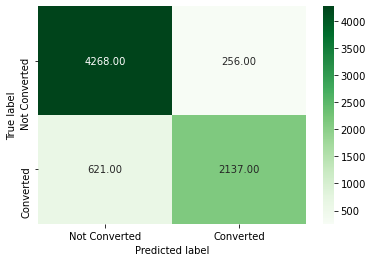

In [116]:
draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

In [117]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted )
confusion

array([[4268,  256],
       [ 621, 2137]], dtype=int64)

### Measuring Accuracies

In [118]:
print(metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))

0.8795660532820654


In [119]:
print( metrics.classification_report( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted ) )

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4524
           1       0.89      0.77      0.83      2758

    accuracy                           0.88      7282
   macro avg       0.88      0.86      0.87      7282
weighted avg       0.88      0.88      0.88      7282



### Metrics beyond simply accuracy

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7748368382886149

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.9434129089301503

In [123]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05658709106984969


In [124]:
# positive predictive value 
print (TP / float(TP+FP))

0.893021312160468


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8729801595418286


### Plotting the ROC Curve

In [126]:
# Defining the function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob, drop_intermediate = False )

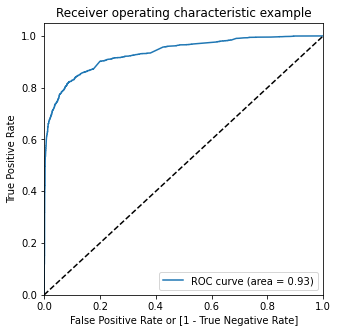

In [128]:
draw_roc(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

### Optimal Cutoff Point

In [129]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0        0.093612          9000          0    1    0    0    0   
1              0        0.081707          6902          0    1    0    0    0   
2              0        0.128237          7593          0    1    1    0    0   
3              0        0.232540          1498          0    1    1    1    0   
4              1        0.983129          4137          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    1    1    1    1    1    1

In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378742  1.000000  0.000000
0.1   0.1  0.684702  0.965555  0.513484
0.2   0.2  0.825872  0.908267  0.775641
0.3   0.3  0.868031  0.843727  0.882847
0.4   0.4  0.877369  0.808920  0.919098
0.5   0.5  0.879566  0.774837  0.943413
0.6   0.6  0.875309  0.736041  0.960212
0.7   0.7  0.868580  0.693619  0.975243
0.8   0.8  0.858967  0.649384  0.986737
0.9   0.9  0.841939  0.594634  0.992706


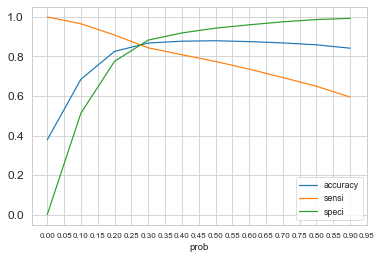

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

#### From the curve above, 0.27 is the optimum point to take it as a cutoff probability.

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0        0.093612          9000          0    1    0    0    0   
1              0        0.081707          6902          0    1    0    0    0   
2              0        0.128237          7593          0    1    1    0    0   
3              0        0.232540          1498          0    1    1    1    0   
4              1        0.983129          4137          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    0    0    0    0    0    0                0  
4    1    1    1    1    1    1                1

In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

0.8630870639934084

In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
confusion2

array([[3929,  595],
       [ 402, 2356]], dtype=int64)

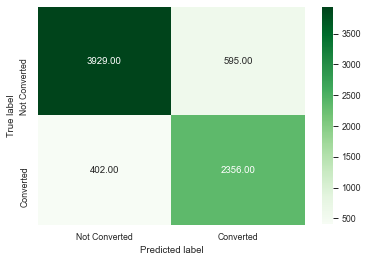

In [135]:
draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8542422044960116

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.8684792219274978

In [139]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1315207780725022


In [140]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7983734327346662


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9071807896559686


### Precision and Recall

In [142]:
#Looking at the confusion matrix again
confusion2

array([[3929,  595],
       [ 402, 2356]], dtype=int64)

##### Precision
TP / TP + FP

In [143]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7983734327346662

##### Recall
TP / TP + FN

In [144]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8542422044960116

Using sklearn utilities for the same

In [145]:
from sklearn.metrics import precision_score, recall_score

In [146]:
precision_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

0.893021312160468

In [147]:
recall_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

0.7748368382886149

### Precision and recall tradeoff

In [148]:
from sklearn.metrics import precision_recall_curve

In [149]:
y_train_pred_final.Converted_IND, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7277    0
 7278    1
 7279    1
 7280    1
 7281    0
 Name: Converted_IND, Length: 7282, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7277    0
 7278    1
 7279    0
 7280    1
 7281    0
 Name: Predicted, Length: 7282, dtype: int64)

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

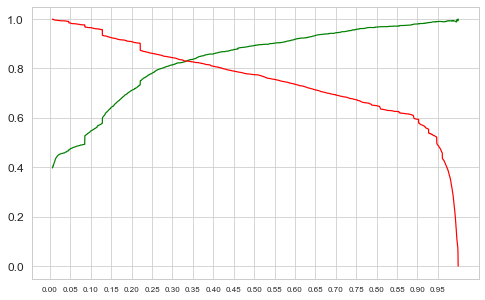

In [151]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)

plt.show()

#### 0.34 is the optimum point to take as a threshold

In [152]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0        0.093612          9000          0    1    0    0    0   
1              0        0.081707          6902          0    1    0    0    0   
2              0        0.128237          7593          0    1    1    0    0   
3              0        0.232540          1498          0    1    1    1    0   
4              1        0.983129          4137          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    0    0    0    0    0    0                0  
4    1    1    1    1    1    1                1

In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

0.8728371326558638

In [154]:
# Let's check the confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
confusion3

array([[4069,  455],
       [ 471, 2287]], dtype=int64)

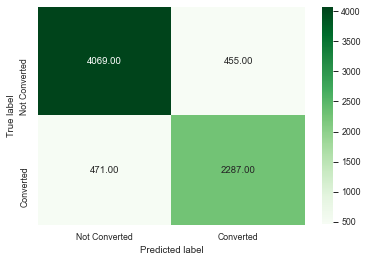

In [155]:
draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [156]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8292240754169689

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.8994252873563219

In [159]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10057471264367816


In [160]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8340627279358133


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8962555066079295


In [162]:
#Precision
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8340627279358133

In [163]:
#Recall
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8292240754169689

# Step 12: Making predictions on the test set

In [164]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 3504 to 8487
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               1821 non-null   float64
 1   Total Time Spent on Website               1821 non-null   int64  
 2   A free copy of Mastering The Interview    1821 non-null   int64  
 3   Lead Origin_Lead Add Form                 1821 non-null   uint8  
 4   Lead Origin_Lead Import                   1821 non-null   uint8  
 5   Lead Source_Google                        1821 non-null   uint8  
 6   Lead Source_Organic Search                1821 non-null   uint8  
 7   Lead Source_Referral Sites                1821 non-null   uint8  
 8   Last Activity_Email Bounced               1821 non-null   uint8  
 9   Last Activity_Email Link Clicked          1821 non-null   uint8  
 10  Last Activity_Email Opened       

In [165]:
X_test.head()

TotalVisits  Total Time Spent on Website  \
3504          3.0                          424   
4050          0.0                            0   
7201          2.0                          712   
1196          4.0                          423   
8219          7.0                          247   

      A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
3504                                       1                          0   
4050                                       0                          1   
7201                                       1                          0   
1196                                       1                          0   
8219                                       1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
3504                        0                   0                           1   
4050                        0                   0                           0   
7201                        0                   0                           0   
1196                        0                   0                           1   
8219                        0                   0                           0   

      Lead Source_Referral Sites  Last Activity_Email Bounced  \
3504                           0                            0   
4050                           0                            0   
7201                           0                            0   
1196                           0                            0   
8219                           0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3504                                 0                           1   
4050                                 0                           0   
7201                                 0                           0   
1196                                 0                           1   
8219                                 0                           0   

      Last Activity_Form Submitted on Website  Last Activity_Others  \
3504                                        0                     0   
4050                                        0                     0   
7201                                        0                     0   
1196                                        0                     0   
8219                                        0                     0   

      Last Activity_Page Visited on Website  \
3504                                      0   
4050                                      0   
7201                                      0   
1196                                      0   
8219                                      1   

      Specialization_Business Administration  Specialization_E-COMMERCE  \
3504                                       1                          0   
4050                                       1                          0   
7201                                       0                          0   
1196                                       0                          0   
8219                                       0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
3504                                  0                                     0   
4050                                  0                                     0   
7201                                  0                                     1   
1196                                  0                                     0   
8219                                  1                                     0   

      Specialization_Hospitality Management  \
3504                                      0   
4050                                      0   
7201                                      0   
1196                                      0   
8219                                      0   

      Specialization_Hum

In [166]:
X_test[var_to_scale] = scaler.transform(X_test[var_to_scale])

In [167]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
3504                    -0.103796                          0   
4050                    -0.881059                          1   
7201                     0.424156                          0   
1196                    -0.105629                          0   
8219                    -0.428267                          0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3504                            0                                 0   
4050                            0                                 0   
7201                            0                                 0   
1196                            0                                 0   
8219                            0                                 0   

      Last Activity_Email Opened  Last Activity_Page Visited on Website  \
3504                           1                                      0   
4050                           0                                      0   
7201                           0                                      0   
1196                           1                                      0   
8219                           0                                      1   

      Specialization_Travel and Tourism  Tags_Interested in other courses  \
3504                                  0                                 0   
4050                                  0                                 0   
7201                                  0                                 0   
1196                                  1                                 0   
8219                                  0                                 0   

      Tags_Ringing  Tags_Will revert after reading the email  \
3504             1                                         0   
4050             0                                         1   
7201             0                                         0   
1196             1                                         0   
8219             0                                         0   

      Last Notable Activity_Modified  
3504                               0  
4050                               0  
7201                               0  
1196                               0  
8219                               0

In [168]:
X_test_sm = sm.add_constant(X_test)

In [169]:
X_test_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [170]:
# Removing 'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
#          'Specialization_Healthcare Management' & 'Specialization_International Business'

X_test_sm=X_test_sm[['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified']]

### Making predictions

In [171]:
y_test_pred = logm6_model.predict(X_test_sm)

In [172]:
y_test_pred[:10]

3504    0.010601
4050    0.999357
7201    0.496456
1196    0.004620
8219    0.144526
8747    0.128237
9048    0.753483
6524    0.111615
7693    0.268404
8187    0.460483
dtype: float64

In [173]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [174]:
# Let's see the head
y_pred_1.head()

0
3504  0.010601
4050  0.999357
7201  0.496456
1196  0.004620
8219  0.144526

In [175]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
3504          0
4050          1
7201          0
1196          0
8219          1

In [176]:
# Putting Prospect_IND to index
y_test_df['Prospect_IND'] = y_test_df.index

In [177]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [178]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [179]:
y_pred_final.head()

Converted  Prospect_IND         0
0          0          3504  0.010601
1          1          4050  0.999357
2          0          7201  0.496456
3          0          1196  0.004620
4          1          8219  0.144526

In [180]:
# Renaming the columns
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

In [181]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)

In [182]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect_IND  Converted_IND  Converted_Prob
0          3504              0        0.010601
1          4050              1        0.999357
2          7201              0        0.496456
3          1196              0        0.004620
4          8219              1        0.144526

In [183]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [184]:
y_pred_final.head()

Prospect_IND  Converted_IND  Converted_Prob  final_predicted
0          3504              0        0.010601                0
1          4050              1        0.999357                1
2          7201              0        0.496456                1
3          1196              0        0.004620                0
4          8219              1        0.144526                0

## Overall Accuracy on Test dataset

In [185]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8780889621087314

## Confusion Matrix on Test prediction

In [186]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
confusion_final

array([[1011,  107],
       [ 115,  588]], dtype=int64)

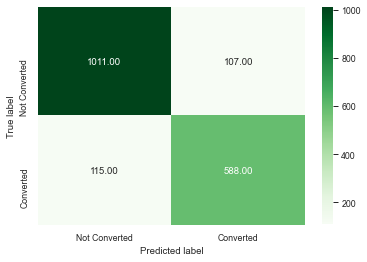

In [187]:
draw_cm( y_pred_final.Converted_IND, y_pred_final.final_predicted )

In [188]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

## Sensitivity

In [189]:
TP / float(TP+FN)

0.8364153627311522

## Specificity

In [190]:
TN / float(TN+FP)

0.9042933810375671

In [191]:
y_test=y_pred_final["Converted_IND"]
y_test

0       0
1       1
2       0
3       0
4       1
       ..
1816    1
1817    1
1818    1
1819    1
1820    0
Name: Converted_IND, Length: 1821, dtype: int64

## Precision and Recall

In [192]:
# Precision
confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])

0.8460431654676259

In [193]:
# Recall
confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])

0.8364153627311522

The precision and recall rates above 80%, which is good for the model

Also, sensitivity is above 80% and specificity is close to 90%, which again is good indicator that the model is performing well.

## ROC curve (Area Under Curve)

In [194]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted_IND,
                                         y_pred_final.Converted_Prob, drop_intermediate=False)

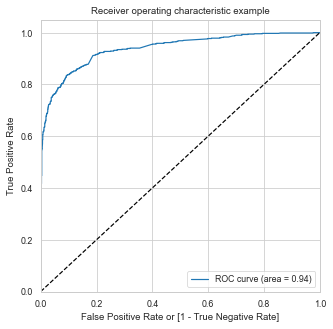

In [195]:
draw_roc( y_pred_final.Converted_IND, y_pred_final.Converted_Prob)

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

So, based on above our model has good ROC curve and larger area under curve (0.94)

# Step 13: Lead Scoring

In [196]:
y_pred_final

Prospect_IND  Converted_IND  Converted_Prob  final_predicted
0             3504              0        0.010601                0
1             4050              1        0.999357                1
2             7201              0        0.496456                1
3             1196              0        0.004620                0
4             8219              1        0.144526                0
...            ...            ...             ...              ...
1816           643              1        0.040992                0
1817          7424              1        0.968648                1
1818          1529              1        0.604120                1
1819          7525              1        0.999357                1
1820          8487              0        0.081036                0

[1821 rows x 4 columns]

In [197]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)

Prospect_IND  Converted_IND  Converted_Prob  final_predicted  lead_score
910           4297              1        0.995004                1          99
274           6170              1        0.995728                1          99
1398          8597              1        0.994699                1          99
1395          5692              1        0.997428                1          99
989           9169              1        0.992945                1          99
...            ...            ...             ...              ...         ...
1461           550              0        0.003453                0           0
847           4870              0        0.005076                0           0
848           1303              0        0.008699                0           0
1679          4372              0        0.006776                0           0
1703          7226              0        0.008022                0           0

[1821 rows x 5 columns]

So, by multiplying the probability score with 100, we have assigned a lead score to all the rows which is between 1 to 100.

# Step 14: Lift & Gain Method for Maximizing the Conversion rate

In [198]:
sorted_predict_df = y_pred_final[['Converted_Prob',
                               'Converted_IND']].sort_values( 'Converted_Prob',
                                                      ascending = False )
sorted_predict_df

Converted_Prob  Converted_IND
370         0.999946              1
1116        0.999934              1
250         0.999412              1
751         0.999357              1
1004        0.999357              1
...              ...            ...
807         0.001470              0
669         0.001400              0
271         0.001296              0
1488        0.001272              0
513         0.000683              0

[1821 rows x 2 columns]

In [199]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  182


In [200]:
def get_deciles( df ): 
    df['decile'] = 1
    idx = 0
    for each_d in range( 0, 10 ):
        df.iloc[idx:idx+num_per_decile, 
                df.columns.get_loc('decile')] = each_d,
        idx += num_per_decile
       
    df['decile'] = df['decile'] + 1 
    return df

In [201]:
deciles_predict_df = get_deciles( sorted_predict_df )

In [202]:
deciles_predict_df

Converted_Prob  Converted_IND  decile
370         0.999946              1       1
1116        0.999934              1       1
250         0.999412              1       1
751         0.999357              1       1
1004        0.999357              1       1
...              ...            ...     ...
807         0.001470              0      10
669         0.001400              0      10
271         0.001296              0      10
1488        0.001272              0      10
513         0.000683              0       2

[1821 rows x 3 columns]

In [203]:
deciles_predict_df[0:10]

Converted_Prob  Converted_IND  decile
370         0.999946              1       1
1116        0.999934              1       1
250         0.999412              1       1
751         0.999357              1       1
1004        0.999357              1       1
1597        0.999357              1       1
571         0.999357              1       1
579         0.999357              1       1
1041        0.999357              1       1
1579        0.999357              1       1

In [204]:
gain_lift_df = pd.DataFrame( 
    deciles_predict_df.groupby(
        'decile')['Converted_IND'].sum() ).reset_index() 
gain_lift_df.columns = ['decile', 'gain']

In [205]:
gain_lift_df['gain_percentage'] = (100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())
gain_lift_df

decile  gain  gain_percentage
0       1   180        25.604552
1       2   180        51.209104
2       3   149        72.403983
3       4    88        84.921764
4       5    55        92.745377
5       6    12        94.452347
6       7    20        97.297297
7       8     9        98.577525
8       9     8        99.715505
9      10     2       100.000000

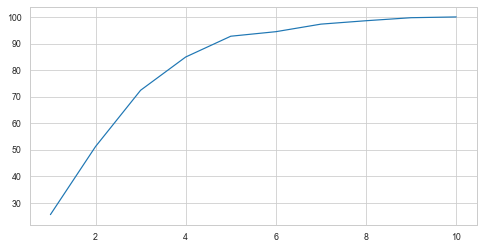

In [206]:
plt.figure( figsize = (8,4)) 
plt.plot( gain_lift_df['decile'],
         gain_lift_df['gain_percentage'], '-' ) 
plt.show()

In [207]:
gain_lift_df['lift'] = ( gain_lift_df.gain_percentage / ( gain_lift_df.decile * 10) )
gain_lift_df

decile  gain  gain_percentage      lift
0       1   180        25.604552  2.560455
1       2   180        51.209104  2.560455
2       3   149        72.403983  2.413466
3       4    88        84.921764  2.123044
4       5    55        92.745377  1.854908
5       6    12        94.452347  1.574206
6       7    20        97.297297  1.389961
7       8     9        98.577525  1.232219
8       9     8        99.715505  1.107950
9      10     2       100.000000  1.000000

In [208]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  182


# Step 14: Top Features/Predictors

In [209]:
pd.options.display.float_format = '{:.2f}'.format
final_parameters = logm6_model.params[1:]
final_parameters

Total Time Spent on Website                 0.95
Lead Origin_Lead Add Form                   4.46
Last Activity_Email Bounced                -2.03
Last Activity_Email Link Clicked           -0.78
Last Activity_Email Opened                 -0.66
Last Activity_Page Visited on Website      -0.95
Specialization_Travel and Tourism          -0.83
Tags_Interested in other courses           -2.44
Tags_Ringing                               -3.36
Tags_Will revert after reading the email    4.15
Last Notable Activity_Modified             -1.12
dtype: float64

In [210]:
top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Total Time Spent on Website                 21.39
Lead Origin_Lead Add Form                  100.00
Last Activity_Email Bounced                -45.39
Last Activity_Email Link Clicked           -17.42
Last Activity_Email Opened                 -14.71
Last Activity_Page Visited on Website      -21.30
Specialization_Travel and Tourism          -18.70
Tags_Interested in other courses           -54.72
Tags_Ringing                               -75.32
Tags_Will revert after reading the email    92.91
Last Notable Activity_Modified             -24.99
dtype: float64

In [211]:
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
top_predictors_sort

Total Time Spent on Website                  8
Lead Origin_Lead Add Form                    7
Last Activity_Email Bounced                  2
Last Activity_Email Link Clicked            10
Last Activity_Email Opened                   5
Last Activity_Page Visited on Website        6
Specialization_Travel and Tourism            3
Tags_Interested in other courses             4
Tags_Ringing                                 0
Tags_Will revert after reading the email     9
Last Notable Activity_Modified               1
dtype: int64

<Figure size 864x576 with 0 Axes>

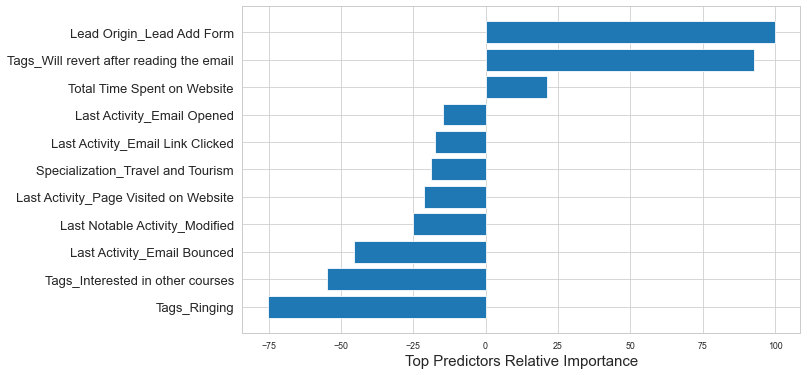

In [212]:
# Plotting the top predictors
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

# ~84% of Recall value indicates that our model is able to predict 84% of actual conversion cases correctly

# ~85% of Precision value indicates that 85% of the conversions that our model predicted is actually converted.